# HeartDisease

##Introducción

En este trabajo vamos a implementar distintos modelos de Machine Learning para de analizar nuestra base de datos, que contiene información acerca de distintos parámetros de personas aleatorias, con el objetivo de predecir si éstas sufrirán o no de una enfermedad cardíaca. Nuestras variables son la edad, el sexo, el dolor de pecho, la presión sanguínea en reposo, el nivel de colesterol, el azúcar en sangre, electrocardiogramas, la frecuencia cardíaca en reposo, la angina de ejercicio, el oldpeak y la pendiente de máximo esfuerzo. Tratamos un total de 918 casos.

In [253]:
import numpy as np
import pandas as pd

## Data Cleansing

Iniciamos el data cleanising. Importamos los datos y visualizamos las primeras 5 filas.

In [254]:
my_data = pd.read_csv("heart.csv", delimiter=",")
my_data[0:5]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


No eliminaremos duplicados ya que consideramos que cada "paciente" refleja una información imporante en el análisis de datos. Además puede darse el caso de dos personas con características semejantes donde el resultado *HeartDisease* no sea el mismo.
Además, como veremos posteriormente no tendremos problemas de *overfitting*, por ello creemos que la no eliminación es lo correcto en este caso.

Seleccionamos como variables las primeras 11 columnas.

In [255]:
X = my_data[['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol',"FastingBS","RestingECG","MaxHR","ExerciseAngina","Oldpeak","ST_Slope"]].values
X[0:5]

array([[40, 'M', 'ATA', 140, 289, 0, 'Normal', 172, 'N', 0.0, 'Up'],
       [49, 'F', 'NAP', 160, 180, 0, 'Normal', 156, 'N', 1.0, 'Flat'],
       [37, 'M', 'ATA', 130, 283, 0, 'ST', 98, 'N', 0.0, 'Up'],
       [48, 'F', 'ASY', 138, 214, 0, 'Normal', 108, 'Y', 1.5, 'Flat'],
       [54, 'M', 'NAP', 150, 195, 0, 'Normal', 122, 'N', 0.0, 'Up']],
      dtype=object)

Tenemos que transformar los datos de las variables (*str* ) que son clasificadas en categorías a valores numéricos. Lo hacemos de la siguiente forma:

In [256]:
from sklearn import preprocessing
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
X[:,1] = le_sex.transform(X[:,1])


le_ChestPainType = preprocessing.LabelEncoder()
le_ChestPainType.fit(['ASY','NAP','ATA','TA'])
X[:,2] = le_ChestPainType.transform(X[:,2])


le_RestingECG = preprocessing.LabelEncoder()
le_RestingECG.fit(['Normal','ST','LVH'])
X[:,6] = le_RestingECG.transform(X[:,6])

le_ExerciseAngina = preprocessing.LabelEncoder()
le_ExerciseAngina.fit(['Y','N'])
X[:,8] = le_ExerciseAngina.transform(X[:,8])


le_ST_Slope = preprocessing.LabelEncoder()
le_ST_Slope.fit(['Flat','Up','Down'])
X[:,10] = le_ST_Slope.transform(X[:,10])

X[0:5]

array([[40, 1, 1, 140, 289, 0, 1, 172, 0, 0.0, 2],
       [49, 0, 2, 160, 180, 0, 1, 156, 0, 1.0, 1],
       [37, 1, 1, 130, 283, 0, 2, 98, 0, 0.0, 2],
       [48, 0, 0, 138, 214, 0, 1, 108, 1, 1.5, 1],
       [54, 1, 2, 150, 195, 0, 1, 122, 0, 0.0, 2]], dtype=object)

Seleccionamos la columna de *HeartDisease* como el resultado que queremos predecir.

In [257]:
y = my_data["HeartDisease"]
y[0:5]

,HeartDisease
0,0
1,1
2,0
3,1
4,0


Seleccionamos los datos que usamos para entrenar al modelo y los que usamos para probar la predicción, destinando un 70% de ellos a lo primero.

In [258]:
from sklearn.model_selection import train_test_split
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

Decidimos también realizar un escalado de datos cuando sea oportuno, no hacerlo directamente en el *Data Cleansing* para todos los modelos escogidos, pues de realizar los cálculos vimos que algunos de nuestros modelos responden mejor sin él.

## Decision Tree

Implementamos ahora el modelo *Decision Tree*. Nos puede resultar muy útil en nuestro caso, ya que es adecuado para problemas de clasificación, dónde el modelo tiene que predecir a partir de unos datos de entrada si el resultado entra en la categoría 0 (*No HeartDisease*) o en la 1 (*HeartDisease*). Este modelo funciona dividiendo los datos en subconjuntos desde la "raíz", donde tras evaluar cada característica toma una decisión ("tallo") realizando finalmente una clasificación en las "hojas".

In [259]:
from sklearn.tree import DecisionTreeClassifier

In [260]:
HeartTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
HeartTree

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [261]:
HeartTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

Realizamos una predicción, donde .predict() es un método de los modelos de *machine learning* en *scikit-learn* que genera predicciones sobre nuevos datos.

In [262]:
predTree = HeartTree.predict(X_testset)

Observamos 5 valores de ejemplo y vemos que todos coinciden.

In [263]:
print (predTree[0:5])
print (y_testset[0:5])

[1 1 1 1 0]
710    1
466    1
557    1
227    1
83     0
Name: HeartDisease, dtype: int64


In [264]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.8333333333333334


Observamos una *accuracy* con un valor muy bueno. Como ya habíamos mencionado era de esperar que este modelo nos diese unos muy buenos resultados.

Mostramos ahora la *confusion matrix* de este modelo, pues esta es una forma intuituva de mostrar los resultados obtenidos tras la realización de las pruebas (parte de test). Vemos entonces como coinciden en gran parte los resultados.


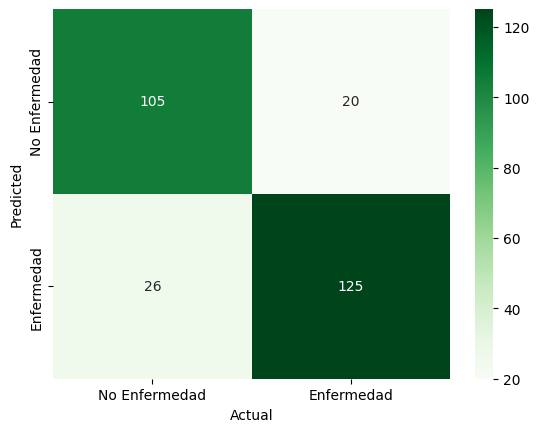

In [265]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

y_trainset_hat = HeartTree.predict(X_trainset)
y_testset_hat = HeartTree.predict(X_testset)

cm = confusion_matrix(y_testset, y_testset_hat)

labels = ['No Enfermedad', 'Enfermedad']
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap='Greens')
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.show()


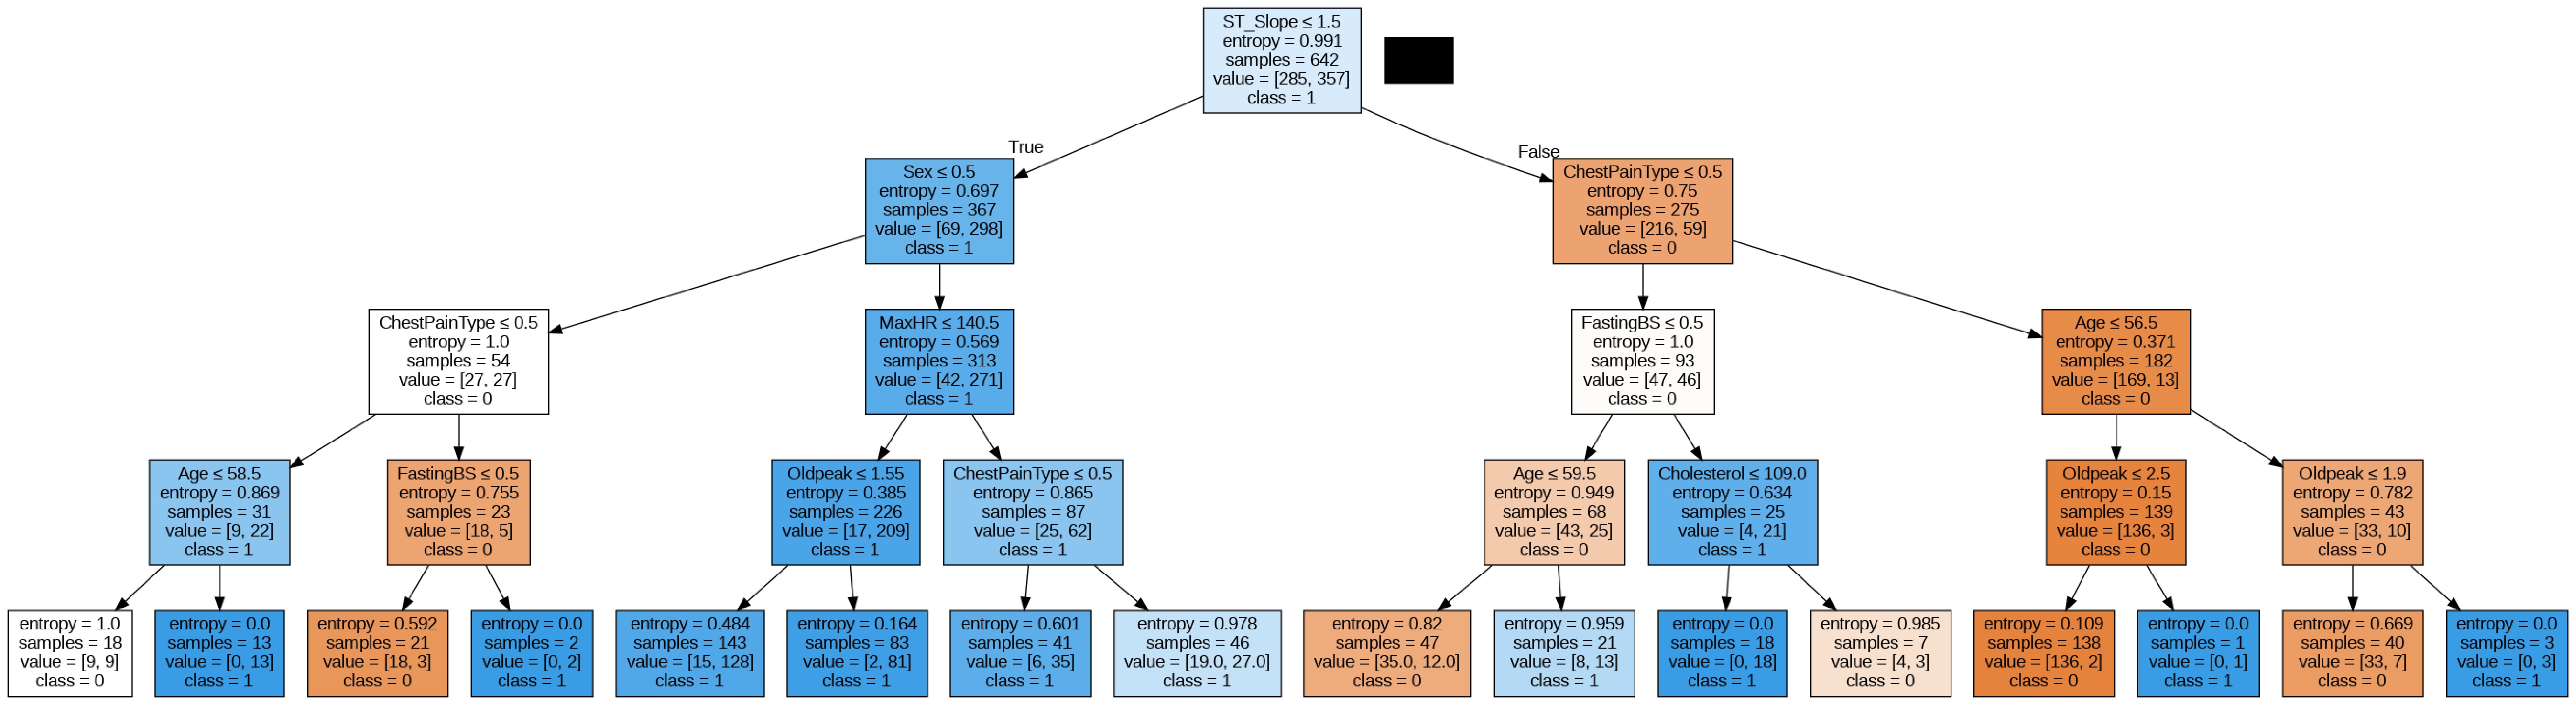

In [266]:
from io import StringIO
from sklearn import tree
import pydotplus
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

featureNames = my_data.columns[0:11]
targetNames = [str(i) for i in my_data['HeartDisease'].unique()]

dot_data = StringIO()
out = tree.export_graphviz(HeartTree, feature_names=featureNames, out_file=dot_data, class_names=[str(i) for i in np.unique(y_trainset)], filled=True, special_characters=True, rotate=False)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('hearttree.png')

img = mpimg.imread('hearttree.png')

plt.figure(figsize=(100, 200))
plt.imshow(img, interpolation='nearest')
plt.axis('off')
plt.show()



Escogemos este formato para mostrar nuestro árbol ya que este nos permite guardar la imagen en formato PNG, teniendo al mismo tiempo mucho mas control sobre el grafico final.

## Logistic Regression

Obviaremos emplear la *Linear Regression* ya que para nuestros datos no tiene sentido pensar que vamos a tener un mejor resultado que la *LR* , ya que ninguno de nuestros parámetros depende linealmente del *HeartDissease*.

Este modelo es utilizado comunmente para problemas de clasifiación binaria (como es nuestro caso). Emplea una funcion sigmoide para a partir de los datos obetener una probabilidad entre 0 y 1, si la probabilidad es >0.5 se precide clase positiva.

Utilizamos como variable predictora la edad, pues consideramos interesante ver gráficamente como es la relación Edad-*HeartDissease*, al igual que también resulta de especial interés con qué *accuracity* podemos saber el posible *HeartDissease* únicamente conociendo la edad de la persona.

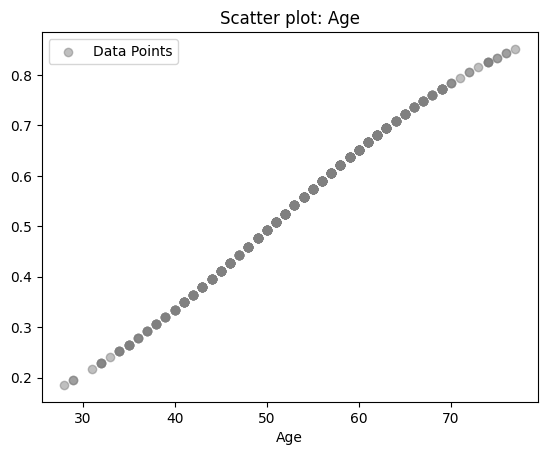

In [267]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_age = X[:, 0].reshape(-1, 1) # Consideramos únicamente la edad
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X_age, y, test_size=0.35, random_state=3)

clf = LogisticRegression(solver='lbfgs', max_iter=1000).fit(X_trainset, y_trainset)

y_trainset_hat = clf.predict(X_trainset)
y_testset_hat = clf.predict(X_testset)

pro = clf.predict_proba(X_trainset)[:, 1] # Probabilidad HeartDisease

plt.scatter(X_trainset, pro, color='gray', alpha=0.5, label='Data Points')
plt.xlabel('Age')
plt.title('Scatter plot: Age')
plt.legend()
plt.show()

In [268]:
clf.score(X_testset,y_testset)

0.6335403726708074

En este modelo mostramos también la matriz de confusión, donde se evalua el rendimiento de los datos de entrenamiento, útil para detectar *overfitting* (rendimiento muy bueno en el entrenamiento y pobre en el test).

In [269]:
from sklearn.metrics import confusion_matrix
import pandas as pd

labels=[0,1]
cm = confusion_matrix(y_trainset, y_trainset_hat, labels=labels)
cm_display = pd.DataFrame(cm, index=['no','yes'], columns=['no','yes'])
print(cm_display)

      no  yes
no   119  148
yes   78  251


Text(0.5, 23.52222222222222, 'Actual')

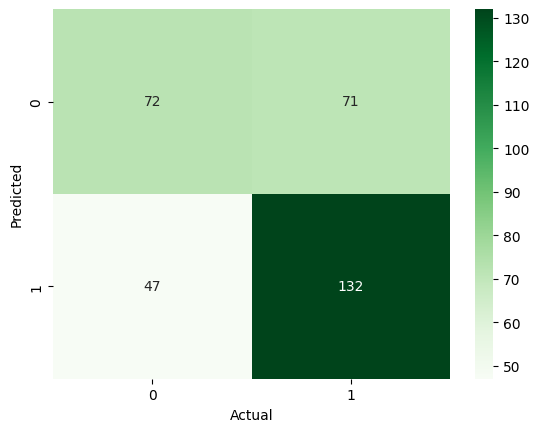

In [270]:
import seaborn as sns

cm = confusion_matrix(y_testset, y_testset_hat)
sns.heatmap(cm, annot=True, fmt='d',xticklabels=labels, yticklabels=labels, cmap='Greens')
plt.ylabel('Predicted')
plt.xlabel('Actual')

Como ya habíamos dicho en el *Data Cleansing* no detectamos *overfitting*, los resultados son muy siilares en ambos. Observando un numero mayor de casos en el entrenamiento debido a la mayor cantidad de datos adjudicados a este.

In [271]:
TP,FP,FN,TN=cm.flatten()
print(TP,FP,FN,TN)

72 71 47 132


In [272]:
TPR = TP/(TP+FN)
TPR

0.6050420168067226

In [273]:
PPV = TP/(TP+FP)
PPV

0.5034965034965035

In [274]:
(TP+TN)/cm.sum()

0.6335403726708074

In [275]:
F = (2*TPR*PPV)/(TPR+PPV)
F

0.549618320610687

In [276]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
print(accuracy_score(y_testset,y_testset_hat))
print(classification_report(y_testset,y_testset_hat))

0.6335403726708074
              precision    recall  f1-score   support

           0       0.61      0.50      0.55       143
           1       0.65      0.74      0.69       179

    accuracy                           0.63       322
   macro avg       0.63      0.62      0.62       322
weighted avg       0.63      0.63      0.63       322



Observamos un *accuracity* de la relación entre *Age* -*HeartDisease* de 0.63. LLendo un poco más allá, podemos buscar en la red el valor esperado para esta relación y observamos que es alrededor de 0.60 - 0.70 en numerosos estudios. Podemos concluir entonces que nuestra relación es sorprendentemente buena.
Cabe destacar también que no podíamos esperar un valor similar al resto de los que veremos durante el trabajo, pues aquí estamos considerando únicamente una variable.

## ANN

Estudiaremos ahora un modelaje de red neuronal inspirado en el funcionamiento del cerebro humano. Esta estará compuesta por neuronas organizadas en capas (entrada, ocultas y salida) donde cada neurona recibirá información de las neuronas de la capa anterior, procesará la información y pasa la información a las neuronas de la capa siguiente.


 Este modelo nos puede ser útil para encontrar patrones a partir de un gran número de variables, las cuales no tienen por qué tener una dependencia lineal.

En el caso de las redes neuronales es necesario hacer un reescalado de los datos, para que cada variable tenga un peso equivalente en el modelo.
En nuestro caso hacemos un reescalado estándar, con una media de 0 y una desviación estándar de 1.

In [277]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import SGD
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

# Escalamos los datos
scaler = MinMaxScaler()
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)
X_trainset = scaler.fit_transform(X_trainset)
X_testset = scaler.transform(X_testset)

X_trainset = np.array(X_trainset, dtype=np.float32)
y_trainset = np.array(y_trainset, dtype=np.float32)

model = keras.Sequential([layers.Dense(20, activation='relu', input_shape=(11,)),layers.Dense(20, activation='relu'),layers.Dense(20, activation='relu'),layers.Dense(1, activation='sigmoid')])
sgd = SGD(learning_rate=0.01)

model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_trainset, y_trainset, epochs=500, batch_size=10, validation_split=0.2)



Epoch 1/500


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4850 - loss: 0.6923 - val_accuracy: 0.7132 - val_loss: 0.6693
Epoch 2/500
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7391 - loss: 0.6651 - val_accuracy: 0.7519 - val_loss: 0.6529
Epoch 3/500
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7081 - loss: 0.6430 - val_accuracy: 0.7519 - val_loss: 0.6369
Epoch 4/500
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7390 - loss: 0.6223 - val_accuracy: 0.7442 - val_loss: 0.6188
Epoch 5/500
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7725 - loss: 0.5960 - val_accuracy: 0.7752 - val_loss: 0.5965
Epoch 6/500
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7846 - loss: 0.5757 - val_accuracy: 0.7674 - val_loss: 0.5774
Epoch 7/500
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8147 - loss: 0.5475 - val_accuracy: 0.7674 - val_loss: 0.5523
Epoch 8/500
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8310 - loss: 0.5199 - val_accuracy: 0.7674 - val_loss: 0.5

In [278]:
y_hat_trainset = model.predict(X_trainset).round()
y_hat_trainset[:5]

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


array([[1.],
       [1.],
       [1.],
       [1.],
       [0.]], dtype=float32)

In [279]:
X_testset = np.array(X_testset, dtype=np.float32)
y_hat_testset = model.predict(X_testset).round()
y_hat_testset[:5]

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


array([[1.],
       [1.],
       [1.],
       [1.],
       [0.]], dtype=float32)

Como antes, añadimos también la matriz de confusión del entrenamiento para comprobar el *overfitting*.

In [280]:
from sklearn.metrics import confusion_matrix
import pandas as pd

labels = [0, 1]

cm = confusion_matrix(y_trainset, y_hat_trainset, labels=labels)

cm_display = pd.DataFrame(cm, index=['no', 'yes'], columns=['no', 'yes'])
print(cm_display)

      no  yes
no   203   82
yes    8  349


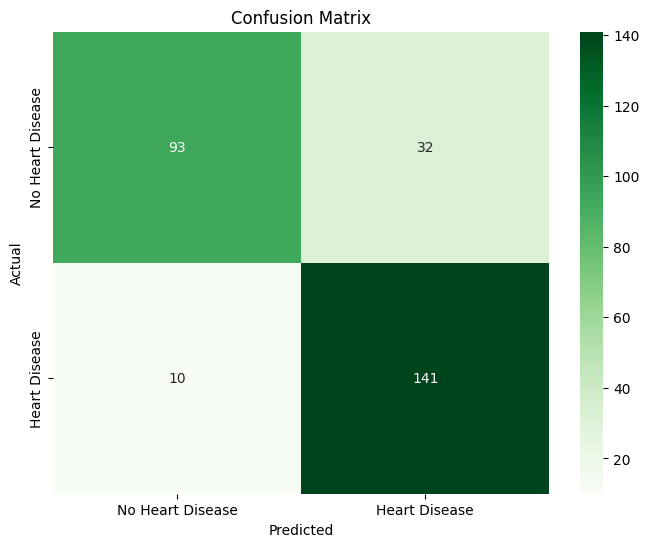

In [281]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_testset, y_hat_testset)

labels = ['No Heart Disease', 'Heart Disease']

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=labels, yticklabels=labels)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


In [282]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
print(accuracy_score(y_testset,y_hat_testset))
print(classification_report(y_testset,y_hat_testset))

0.8478260869565217
              precision    recall  f1-score   support

           0       0.90      0.74      0.82       125
           1       0.82      0.93      0.87       151

    accuracy                           0.85       276
   macro avg       0.86      0.84      0.84       276
weighted avg       0.85      0.85      0.85       276



Con el modelo ANN vemos que podemos predecir un *HeartDisease* con casi un 0.85 de *accuracy*. Vemos como este modelo de *Machine Learning* se ajusta realmente bien a nuestros datos.

## SVM

Empleamos ahora el modelo *Support Vector Machine* el cual se basa principalmente en encontra un hiperplano que separe los puntos de diferentes clases en un espacio de características, teniendo como objetivo maximizar el márgen entre las clases

In [283]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
SVM = SVC(kernel = 'linear')

X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)
SVM.fit(X_trainset, y_trainset)

y_hat_testset = SVM.predict(X_testset)
accuracy_SVM = accuracy_score(y_testset, y_hat_testset)
print(accuracy_score(y_testset,y_hat_testset))
print(classification_report(y_testset,y_hat_testset))

0.8768115942028986
              precision    recall  f1-score   support

           0       0.87      0.86      0.86       125
           1       0.88      0.89      0.89       151

    accuracy                           0.88       276
   macro avg       0.88      0.88      0.88       276
weighted avg       0.88      0.88      0.88       276



Este modelo nos da un valor muy bueno de casi 0.88, superior y muy próximo al del modelo *ANN*.

Mostramos la matriz de confusión de la parte del test, y vemos de nuevo como en gran parte, coinciden.

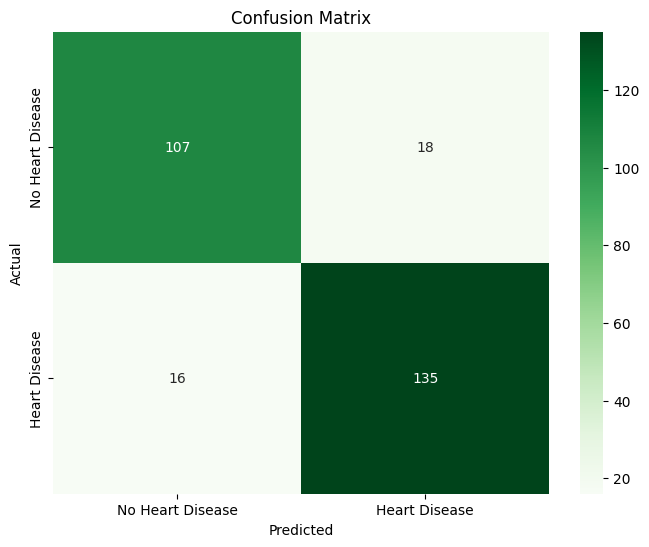

In [284]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_testset, y_hat_testset)

labels = ['No Heart Disease','Heart Disease']
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=labels, yticklabels=labels)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

## XGBoost

Decidimos añadir un modelo extra a parte de los mencionados ya que consideramos que este puede darnos una información muy interesante y valiosa sobre la importancia de las variables de estudio a lo largo del trabajo.

Este modelo implementa el *boosting* por gradiente, esta técnica de aprendizaje emplea varios modelos débiles (en nuestro caso, pequeños árboles de decisión), donde estes se combinan secuencialmente para crear un modelo fuerte.

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:05:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


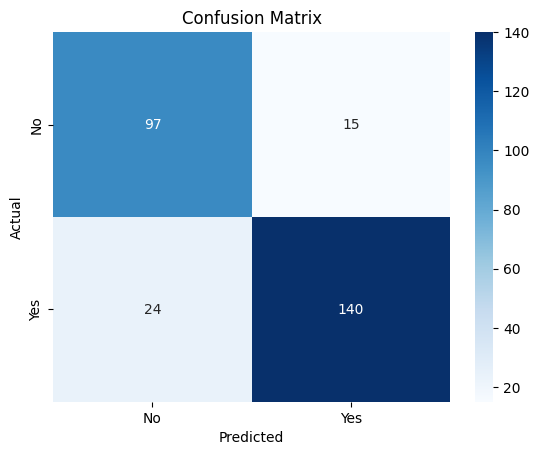

In [285]:
import xgboost as xgb
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=42)

model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False)
model.fit(X_trainset, y_trainset)

y_hat_testset = model.predict(X_testset)

accuracy = accuracy_score(y_testset, y_hat_testset)

cm = confusion_matrix(y_testset, y_hat_testset)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No','Yes'], yticklabels=['No','Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [286]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
print(accuracy_score(y_testset,y_hat_testset))
print(classification_report(y_testset,y_hat_testset))
incorrect_predictions = np.where(y_hat_testset != y_testset)[0]
print(f"Total incorrect predictions: {len(incorrect_predictions)}") # Añadimos cuántas predicciones incorrectas hay

0.8586956521739131
              precision    recall  f1-score   support

           0       0.80      0.87      0.83       112
           1       0.90      0.85      0.88       164

    accuracy                           0.86       276
   macro avg       0.85      0.86      0.86       276
weighted avg       0.86      0.86      0.86       276

Total incorrect predictions: 39


Observamos una *accuracy* alrededor de 0.86, muy similar al *ANN* y el *SVM* y obviamente superior al *Decision Tree* simple. Vemos también, que tenemos alrededor de 40 imprecisiones de 276 en casi todos los modelos empleados, unos resultados suficientemente buenos.

Mostramos a continuación los árboles de decisión, los cuales se puede apreciar que son bastante mas significativos y complejos que el *Decision Tree* simple.

<Figure size 3000x2500 with 0 Axes>

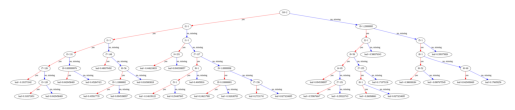

In [287]:
import xgboost as xgb
import matplotlib.pyplot as plt
from xgboost import plot_tree

model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss')
model.fit(X_trainset, y_trainset)

plt.figure(figsize=(30, 25))
plot_tree(model, num_trees=0)
plt.show()

Para finalizar el trabajo, (y siendo esta principalmente la causa por el cual añadimos el *XGBoost*) mostramos cuales son las variables más relevantes a la hora de estudiar la determinación del *HeartDisease*.

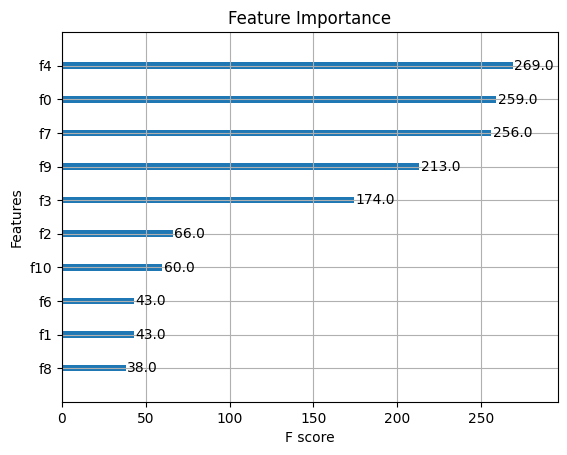

In [288]:
xgb.plot_importance(model, importance_type='weight', max_num_features=10, title='Feature Importance')
plt.show()

Vemos que la variable más importante es el *Cholesterol* , seguida de *Age* y posteriormente de *MaxHR*. Resultados completamente lógicos y congruentes.

## Conclusión

Comparamos los diferentes valores obtenidos de la *accuracy* :


1.   Decision Tree: 0.83
2.   Logistic Regression (con una variable) : 0.63

1.   ANN: 0.85
2.   SVM: 0.88

1.   XGBoost: 0.86









Recordando que la *Logistic Regression* fue realizada con una variable, y que su valor en libros estaba en nuestro rango, podemos concluir con que todos los modelos predicen relativamente bien el *HeartDisease* .

Al mismo tiempo, conocemos qué variables son las más importantes a tener en cuenta para prevenir los problemas de corazón, un resultado interesantísimo y a tener en cuenta (por si acaso).